In [1]:
"""
"""
import numpy as np
from matplotlib import pyplot as plt
import csv

import larnestpy

Text(0.5, 1.0, 'ESTAR Collision Scattering Length for Argon at 1.393 [g/cm${}^2$]')

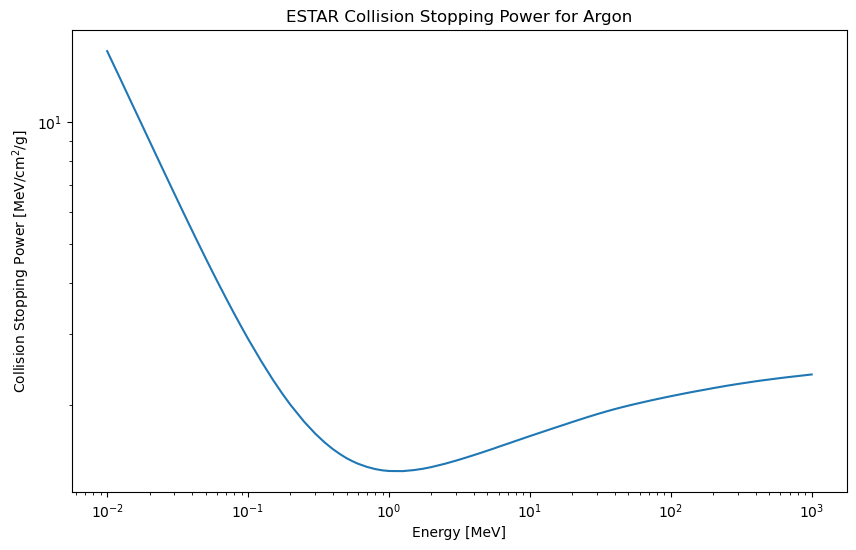

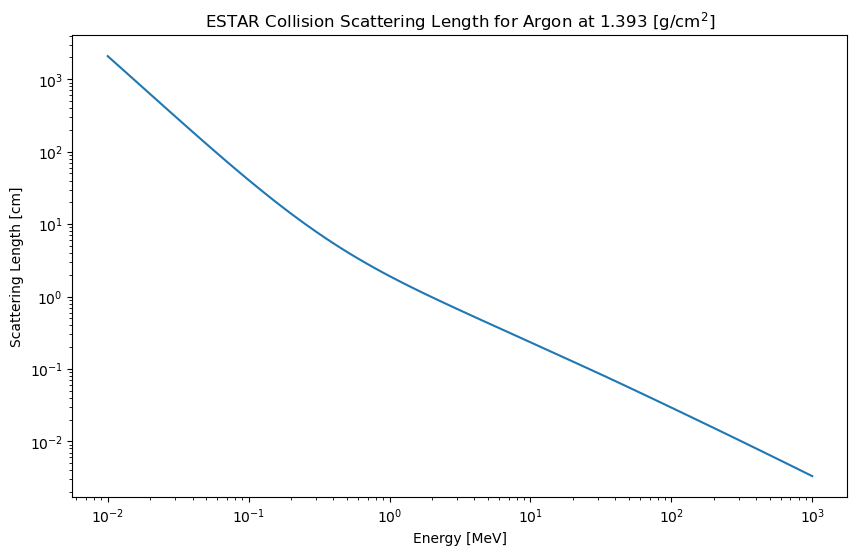

In [2]:
def extract_data(file_path):
    kinetic_energy = []
    collision_stp_pow = []

    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if i < 8:  # Skip the first 8 lines
                continue
            parts = line.split()  # Split the line into parts
            kinetic_energy.append(float(parts[0]))
            collision_stp_pow.append(float(parts[1]))

    # Convert the lists to numpy arrays
    kinetic_energy = np.array(kinetic_energy)
    collision_stp_pow = np.array(collision_stp_pow)

    return kinetic_energy, collision_stp_pow
# NIST values from physics.nist.gov
energies, collision_stp_pow = extract_data('../data/NIST_stopping_power.txt')
dx = collision_stp_pow * 1.393 / energies

fig, axs = plt.subplots(figsize=(10,6))
axs.plot(energies, collision_stp_pow)
axs.set_yscale("log")
axs.set_xscale("log")
axs.set_xlabel("Energy [MeV]")
axs.set_ylabel("Collision Stopping Power [MeV/cm"+r"${}^2$"+"/g]")
axs.set_title("ESTAR Collision Stopping Power for Argon")

fig, axs = plt.subplots(figsize=(10,6))
axs.plot(energies, dx)
axs.set_yscale("log")
axs.set_xscale("log")
axs.set_xlabel("Energy [MeV]")
axs.set_ylabel("Scattering Length [cm]")
axs.set_title("ESTAR Collision Scattering Length for Argon at 1.393 [g/cm"+r"${}^2$"+"]")

In [14]:
# Get ICARUS and T600 data
icarus_energies, icarus_r, icarus_r_std = [], [], []
t600_energies, t600_r, t600_r_std = [], [] ,[]
argoneut_energies, argoneut_energies_std, argoneut_field, argoneut_field_std, argoneut_r, argoneut_r_std = [], [], [], [], [], []
with open("../data/dedx3ton.dat", "r") as file:
    reader = csv.reader(file, delimiter=",")
    next(reader)
    for row in reader:
        icarus_energies.append(float(row[0]))
        icarus_r.append(float(row[1]))
        icarus_r_std.append(float(row[2]))
t600_energies, t600_r, t600_r_std = [], [] ,[]
with open("../data/t600.dat", "r") as file:
    reader = csv.reader(file, delimiter=",")
    next(reader)
    for row in reader:
        t600_energies.append(float(row[0]))
        t600_r.append(float(row[1]))
        t600_r_std.append(float(row[2]))
# Get ArgoNeuT data
with open("../data/ArgoNeuT_protons.csv", "r") as file:
    reader = csv.reader(file, delimiter=",")
    next(reader)
    for row in reader:
        argoneut_energies.append(float(row[0]))
        argoneut_energies_std.append(float(row[1]))
        argoneut_field.append(float(row[2]))
        argoneut_field_std.append(float(row[3]))
        argoneut_r.append(float(row[4]))
        argoneut_r_std.append(float(row[5]))

In [4]:
# energies from 100 eV to 100 MeV
# efield set to 500 V/cm
# density in g/cm^3

energy_range = np.linspace(0.1, 100000.0, 1000000)
efield = 350.0
density = 1.393


In [31]:
calc = larnestpy.LArNEST()
# box_parameters = larnestpy.BOXParameters()
# box_parameters.alpha = 1.0
# box_parameters.beta = 0.30
# calc.set_box_parameters(box_parameters)

# birks_parameters = larnestpy.BIRKSParameters()
# birks_parameters.Ab = 0.87
# birks_parameters.kb = 0.045
# calc.set_birks_parameters(birks_parameters)

dedx_parameters = larnestpy.LArdEdxParameters()
dedx_parameters.c = 0.85
calc.set_dedx_parameters(dedx_parameters)

@np.vectorize
def calculate(calc, interaction, energy, dx, efield, density):
    return calc.full_calculation(interaction, energy, dx, efield, density, False)

In [32]:
larnest_results_er = calculate(calc, larnestpy.ER, energy_range, 1.0, efield, density)
larnest_results_nr = calculate(calc, larnestpy.NR, energy_range, 1.0, efield, density)
larnest_results_alpha = calculate(calc, larnestpy.Alpha, energy_range, 1.0, efield, density)
ndlar_box_results = calculate(calc, larnestpy.BOX, energies * 1e3, dx, efield, density)
ndlar_birks_results = calculate(calc, larnestpy.BIRKS, energies * 1e3, dx, efield, density)
dedx_results = calculate(calc, larnestpy.dEdx, energies * 1e3, dx, efield, density)


In [33]:
larnest_ne_er = np.array([larnest_results_er[ii].yields.Ne for ii in range(len(larnest_results_er))])
larnest_nph_er = np.array([larnest_results_er[ii].yields.Nph for ii in range(len(larnest_results_er))])
larnest_rp_er = np.array([larnest_results_er[ii].yields.RecombinationProbability for ii in range(len(larnest_results_er))])

larnest_ne_nr = np.array([larnest_results_nr[ii].yields.Ne for ii in range(len(larnest_results_nr))])
larnest_nph_nr = np.array([larnest_results_nr[ii].yields.Nph for ii in range(len(larnest_results_nr))])
larnest_rp_nr = np.array([larnest_results_nr[ii].yields.RecombinationProbability for ii in range(len(larnest_results_nr))])

larnest_ne_alpha = np.array([larnest_results_alpha[ii].yields.Ne for ii in range(len(larnest_results_alpha))])
larnest_nph_alpha = np.array([larnest_results_alpha[ii].yields.Nph for ii in range(len(larnest_results_alpha))])
larnest_rp_alpha = np.array([larnest_results_alpha[ii].yields.RecombinationProbability for ii in range(len(larnest_results_alpha))])

ndlar_box_ne = np.array([ndlar_box_results[ii].yields.Ne for ii in range(len(ndlar_box_results))])
ndlar_box_nph = np.array([ndlar_box_results[ii].yields.Nph for ii in range(len(ndlar_box_results))])
ndlar_box_rp = np.array([ndlar_box_results[ii].yields.RecombinationProbability for ii in range(len(ndlar_box_results))])

ndlar_birks_ne = np.array([ndlar_birks_results[ii].yields.Ne for ii in range(len(ndlar_birks_results))])
ndlar_birks_nph = np.array([ndlar_birks_results[ii].yields.Nph for ii in range(len(ndlar_birks_results))])
ndlar_birks_rp = np.array([ndlar_birks_results[ii].yields.RecombinationProbability for ii in range(len(ndlar_birks_results))])

dedx_ne = np.array([dedx_results[ii].yields.Ne for ii in range(len(dedx_results))])
dedx_nph = np.array([dedx_results[ii].yields.Nph for ii in range(len(dedx_results))])
dedx_rp = np.array([dedx_results[ii].yields.RecombinationProbability for ii in range(len(dedx_results))])

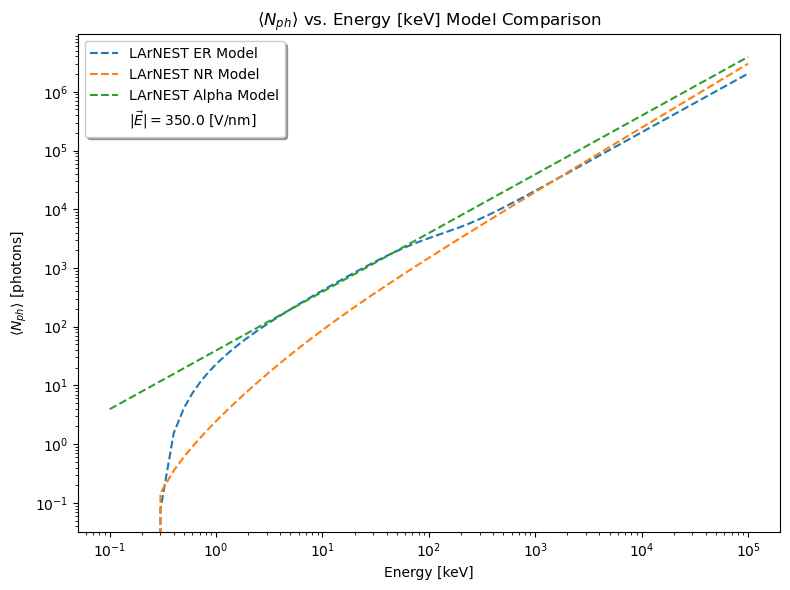

In [34]:
fig, axs = plt.subplots(figsize=(8,6))
axs.plot(energy_range, larnest_nph_er, label="LArNEST ER Model", linestyle='--')
axs.plot(energy_range, larnest_nph_nr, label="LArNEST NR Model", linestyle='--')
axs.plot(energy_range, larnest_nph_alpha, label="LArNEST Alpha Model", linestyle='--')
axs.scatter([],[],label=r"$|\vec{E}| = $"+f"{efield} [V/nm]", marker='')
axs.set_yscale("log")
axs.set_xscale("log")
axs.set_xlabel("Energy [keV]")
# axs.set_xlim(1000, 100000)
axs.set_ylabel(r"$\langle N_{ph}\rangle$" + f" [photons]")
plt.title(r"$\langle N_{ph}\rangle$" + f" vs. Energy [keV] Model Comparison")
plt.legend(shadow=True)
plt.tight_layout()

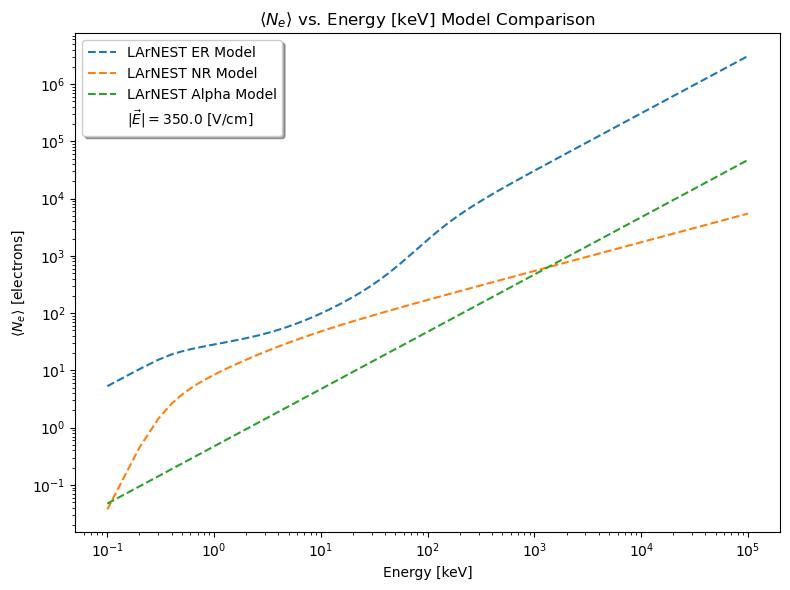

In [35]:
fig, axs = plt.subplots(figsize=(8,6))
axs.plot(energy_range, larnest_ne_er, label="LArNEST ER Model", linestyle='--')
axs.plot(energy_range, larnest_ne_nr, label="LArNEST NR Model", linestyle='--')
axs.plot(energy_range, larnest_ne_alpha, label="LArNEST Alpha Model", linestyle='--')
axs.scatter([],[],label=r"$|\vec{E}| = $"+f"{efield} [V/cm]", marker='')
axs.set_yscale("log")
axs.set_xscale("log")
axs.set_xlabel("Energy [keV]")
# axs.set_xlim(1, 100)
axs.set_ylabel(r"$\langle N_{e}\rangle$" + f" [electrons]")
plt.title(r"$\langle N_{e}\rangle$" + f" vs. Energy [keV] Model Comparison")
plt.legend(shadow=True)
plt.tight_layout()

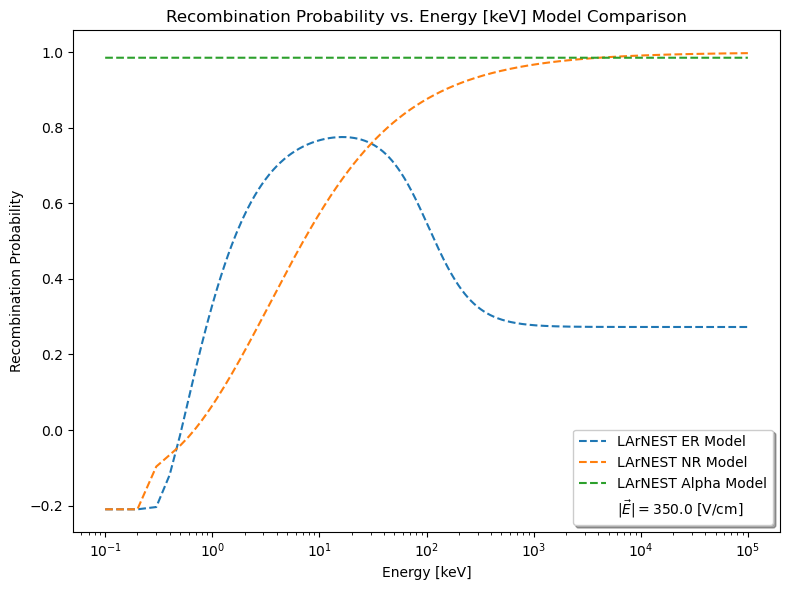

In [36]:
fig, axs = plt.subplots(figsize=(8,6))
axs.plot(energy_range, larnest_rp_er, label="LArNEST ER Model", linestyle='--')
axs.plot(energy_range, larnest_rp_nr, label="LArNEST NR Model", linestyle='--')
axs.plot(energy_range, larnest_rp_alpha, label="LArNEST Alpha Model", linestyle='--')
axs.scatter([],[],label=r"$|\vec{E}| = $"+f"{efield} [V/cm]", marker='')
#axs.set_yscale("log")
axs.set_xscale("log")
axs.set_xlabel("Energy [keV]")
axs.set_ylabel("Recombination Probability")
plt.title(f"Recombination Probability vs. Energy [keV] Model Comparison")
plt.legend(shadow=True)
plt.tight_layout()

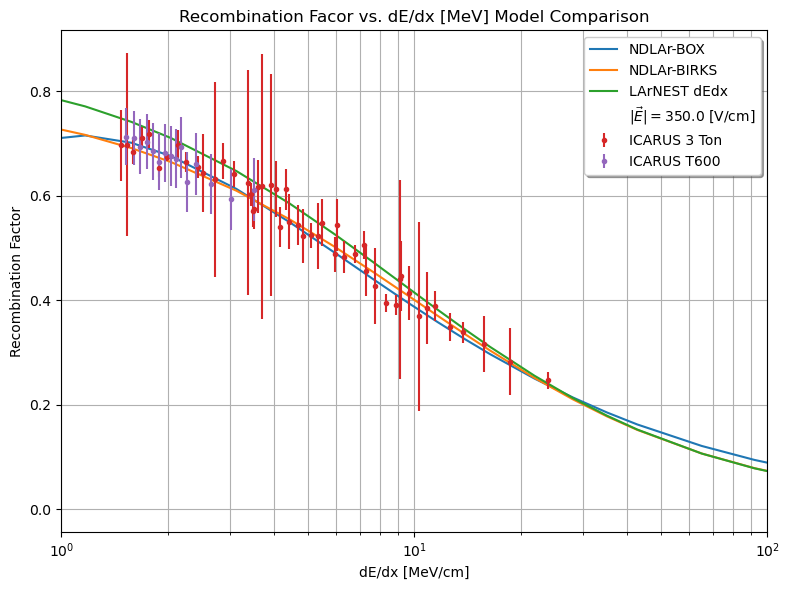

In [37]:
fig, axs = plt.subplots(figsize=(8, 6))
axs.plot(energies / dx, 1.0 - ndlar_box_rp, label="NDLAr-BOX")
axs.plot(energies / dx, 1.0 - ndlar_birks_rp, label="NDLAr-BIRKS")
axs.plot(energies / dx, dedx_rp, label="LArNEST dEdx")
axs.errorbar(icarus_energies, icarus_r, yerr=icarus_r_std, label="ICARUS 3 Ton", linestyle='', marker=".")
axs.errorbar(t600_energies, t600_r, yerr=t600_r_std, label="ICARUS T600", linestyle='', marker=".")
axs.scatter([],[],label=r"$|\vec{E}| = $"+f"{efield} [V/cm]", marker='')

#axs.set_yscale("log")
axs.set_xscale("log")
axs.set_xlabel("dE/dx [MeV/cm]")
axs.set_ylabel("Recombination Factor")
axs.set_xlim(1, 100)
plt.title(f"Recombination Facor vs. dE/dx [MeV] Model Comparison")
plt.grid(True, which="both")
plt.legend(shadow=True)
plt.tight_layout()

In [38]:
ndlar_box_results = calculate(calc, larnestpy.BOX, energies * 1e3, dx, 481, density)
ndlar_birks_results = calculate(calc, larnestpy.BIRKS, energies * 1e3, dx, 481, density)
dedx_results = calculate(calc, larnestpy.dEdx, energies * 1e3, dx, 481, density)

In [39]:
ndlar_box_ne = np.array([ndlar_box_results[ii].yields.Ne for ii in range(len(ndlar_box_results))])
ndlar_box_nph = np.array([ndlar_box_results[ii].yields.Nph for ii in range(len(ndlar_box_results))])
ndlar_box_rp = np.array([ndlar_box_results[ii].yields.RecombinationProbability for ii in range(len(ndlar_box_results))])

ndlar_birks_ne = np.array([ndlar_birks_results[ii].yields.Ne for ii in range(len(ndlar_birks_results))])
ndlar_birks_nph = np.array([ndlar_birks_results[ii].yields.Nph for ii in range(len(ndlar_birks_results))])
ndlar_birks_rp = np.array([ndlar_birks_results[ii].yields.RecombinationProbability for ii in range(len(ndlar_birks_results))])

dedx_ne = np.array([dedx_results[ii].yields.Ne for ii in range(len(dedx_results))])
dedx_nph = np.array([dedx_results[ii].yields.Nph for ii in range(len(dedx_results))])
dedx_rp = np.array([dedx_results[ii].yields.RecombinationProbability for ii in range(len(dedx_results))])

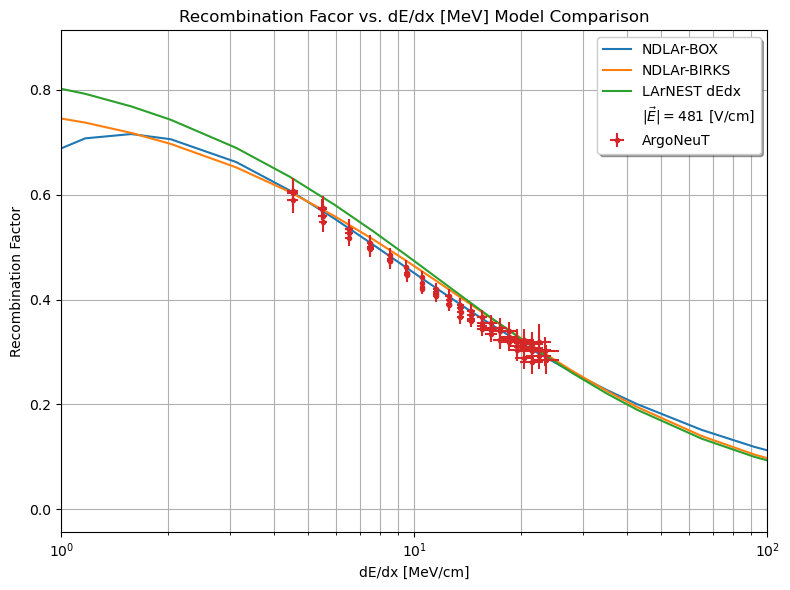

In [40]:
fig, axs = plt.subplots(figsize=(8, 6))
axs.plot(energies / dx, 1.0 - ndlar_box_rp, label="NDLAr-BOX")
axs.plot(energies / dx, 1.0 - ndlar_birks_rp, label="NDLAr-BIRKS")
axs.plot(energies / dx, dedx_rp, label="LArNEST dEdx")
axs.errorbar(argoneut_energies, argoneut_r, xerr=argoneut_energies_std, yerr=argoneut_r_std, label=f"ArgoNeuT", linestyle='', marker='.')
axs.scatter([],[],label=r"$|\vec{E}| = $"+f"{481} [V/cm]", marker='')

#axs.set_yscale("log")
axs.set_xscale("log")
axs.set_xlabel("dE/dx [MeV/cm]")
axs.set_ylabel("Recombination Factor")
axs.set_xlim(1, 100)
plt.title(f"Recombination Facor vs. dE/dx [MeV] Model Comparison")
plt.grid(True, which="both")
plt.legend(shadow=True)
plt.tight_layout()